In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

data = pd.read_csv('/content/hotel_guests_dataset (1).csv')

In [4]:
data

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,23 Apr 2020,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,1,steven59@example.org,False,BASIC,NaN,27 Jun 2020,16 Aug 2020,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,07 Apr 2020,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,08 Jun 2020,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,27 Oct 2019,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978
...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,24 Sep 2020,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,23 Sep 2020,132.147103,USNV Thompson\nFPO AE 99295,30545507259735
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,28 Feb 2021,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,31 Jul 2020,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
guest_email,0
has_rewards,0
room_type,0
amenities_fee,184
checkin_date,0
checkout_date,69
room_rate,0
billing_address,0
credit_card_number,0


In [5]:
# Data Hilang
amefee_mean = data['amenities_fee'].mean()
data['amenities_fee'].fillna(amefee_mean, inplace=True)

data['checkin_date'] = pd.to_datetime(data['checkin_date'])
data['checkout_date'] = pd.to_datetime(data['checkout_date'])
stay = (data['checkout_date'] - data['checkin_date']).dt.days
stay_mean = stay.mean()
checkout_new = data['checkin_date'] + pd.to_timedelta(stay_mean, unit='D')
data['checkout_date'].fillna(checkout_new, inplace=True)

<ipython-input-5-814a499407d8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['amenities_fee'].fillna(amefee_mean, inplace=True)
<ipython-input-5-814a499407d8>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
guest_email,0
has_rewards,0
room_type,0
amenities_fee,0
checkin_date,0
checkout_date,0
room_rate,0
billing_address,0
credit_card_number,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          2000 non-null   int64         
 1   guest_email         2000 non-null   object        
 2   has_rewards         2000 non-null   bool          
 3   room_type           2000 non-null   object        
 4   amenities_fee       2000 non-null   float64       
 5   checkin_date        2000 non-null   datetime64[ns]
 6   checkout_date       2000 non-null   datetime64[ns]
 7   room_rate           2000 non-null   float64       
 8   billing_address     2000 non-null   object        
 9   credit_card_number  2000 non-null   int64         
dtypes: bool(1), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 142.7+ KB


In [ ]:
data.describe()

,Unnamed: 0,amenities_fee,checkin_date,checkout_date,room_rate,credit_card_number
count,2000.000000,2000.000000,2000,2000,2000.000000,2.000000e+03
mean,999.500000,18.625723,2020-07-12 00:41:02.400000,2020-07-14 04:26:59.727809536,156.397620,3.529920e+17
min,0.000000,0.000000,2019-06-12 00:00:00,2019-08-11 00:00:00,83.800000,6.040371e+10
25%,499.750000,12.634222,2020-05-01 00:00:00,2020-05-06 00:00:00,115.704236,3.674461e+13
50%,999.500000,18.625723,2020-07-12 00:00:00,2020-07-16 00:00:00,153.181718,3.514294e+15
75%,1499.250000,24.656033,2020-09-23 00:00:00,2020-09-25 00:00:00,192.001124,4.583879e+15
max,1999.000000,47.478848,2021-07-20 00:00:00,2021-06-12 00:00:00,345.459749,4.984532e+18
std,577.494589,9.434166,NaN,NaN,50.793336,1.212466e+18


<ipython-input-73-d2f4238bf7ed>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rate = df.resample('M').agg({'room_rate': 'mean'}) # Select only 'room_rate' column


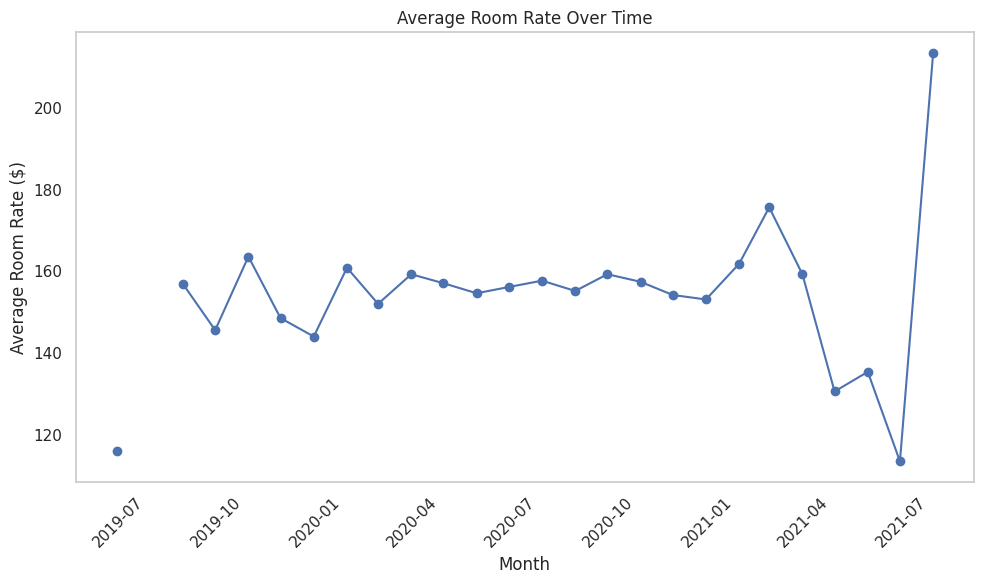

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(data)

# Convert check-in dates to datetime
df['checkin_date'] = pd.to_datetime(df['checkin_date'], format='%d %b %Y')

# Group by month and calculate the average room rate
# Only include numeric columns in the calculation
df.set_index('checkin_date', inplace=True)
monthly_avg_rate = df.resample('M').agg({'room_rate': 'mean'}) # Select only 'room_rate' column

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_rate.index, monthly_avg_rate['room_rate'], marker='o')
plt.title('Average Room Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Average Room Rate ($)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

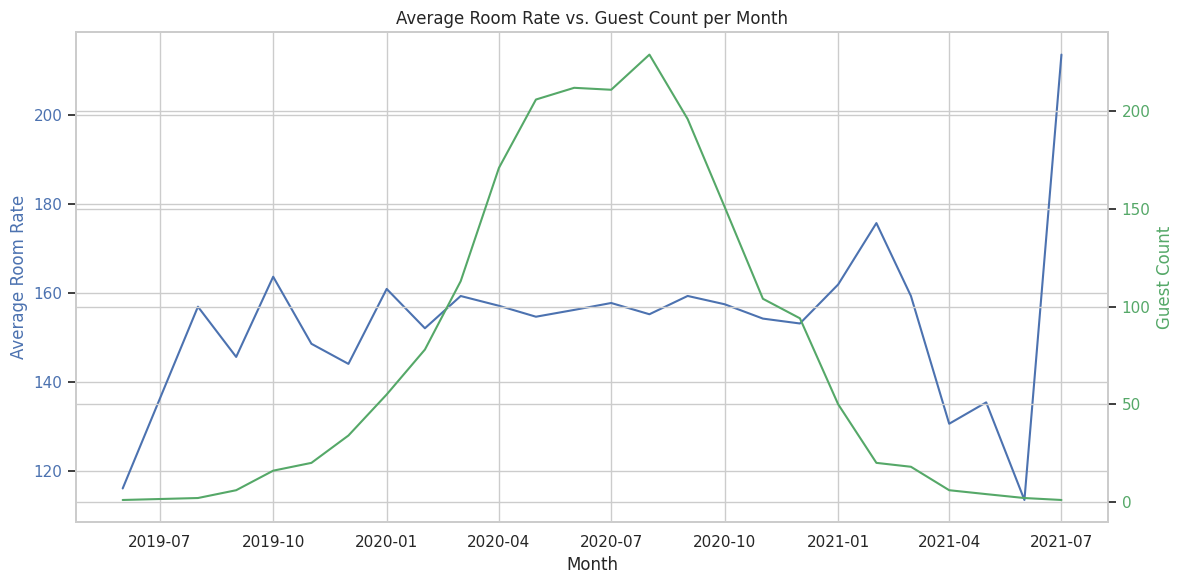

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'checkin_date' and 'room_rate' columns
# Replace 'df' with 'data' in the code

# Convert 'checkin_date' to datetime format if not already
data['checkin_date'] = pd.to_datetime(data['checkin_date'])

# Extract year and month for grouping
data['year_month'] = data['checkin_date'].dt.to_period('M')

# Calculate average room rate and guest count per month
monthly_stats = data.groupby('year_month').agg(
    avg_room_rate=('room_rate', 'mean'),
    guest_count=('checkin_date', 'count')
).reset_index()

# Convert 'year_month' back to datetime for plotting
monthly_stats['year_month'] = monthly_stats['year_month'].dt.to_timestamp()

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average room rate
ax1.plot(monthly_stats['year_month'], monthly_stats['avg_room_rate'], color='b', label='Average Room Rate')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Room Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create second y-axis for guest count
ax2 = ax1.twinx()
ax2.plot(monthly_stats['year_month'], monthly_stats['guest_count'], color='g', label='Guest Count')
ax2.set_ylabel('Guest Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding title and grid
plt.title('Average Room Rate vs. Guest Count per Month')
fig.tight_layout()
plt.show()

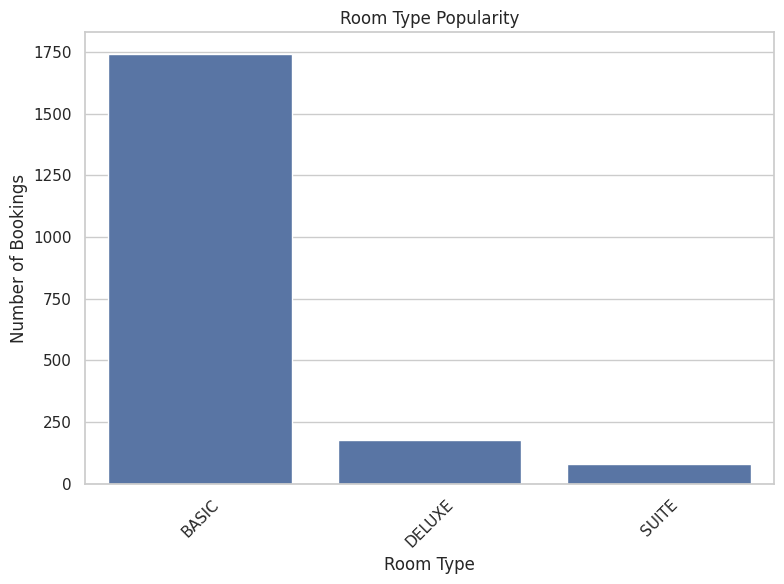

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is in a DataFrame named 'df'
room_type_counts = df['room_type'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Room Type Popularity')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()